<a href="https://colab.research.google.com/github/MSimonFRA-UAS/LfDFra-UAS/blob/main/clustering_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#### Clustering

install.packages("cluster") 
install.packages("factoextra")

library("cluster")
library("factoextra")
library("MASS")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [43]:
# Example 1: USArrests dataset
data("USArrests") 
df <- USArrests

head(df, n = 3)

# Clean and scale the data
df <- na.omit(df)
df <- scale(df)

# Compute Euclidean distance matrix
dist.eucl <- dist(df, method = "euclidean")
round(as.matrix(dist.eucl)[1:3, 1:3], 1)

# Compute Pearson correlation distance matrix
dist.cor <- get_dist(df, method = "pearson")
round(as.matrix(dist.cor)[1:3, 1:3], 1)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0


,Alabama,Alaska,Arizona
Alabama,0.0,2.7,2.3
Alaska,2.7,0.0,2.7
Arizona,2.3,2.7,0.0


,Alabama,Alaska,Arizona
Alabama,0.0,0.7,1.4
Alaska,0.7,0.0,0.8
Arizona,1.4,0.8,0.0


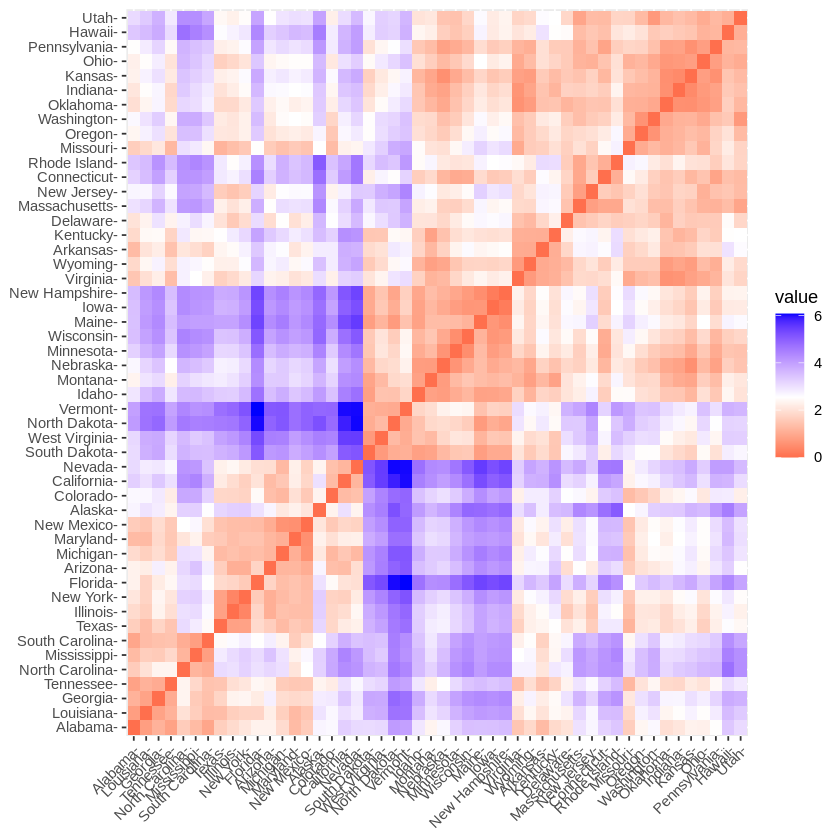

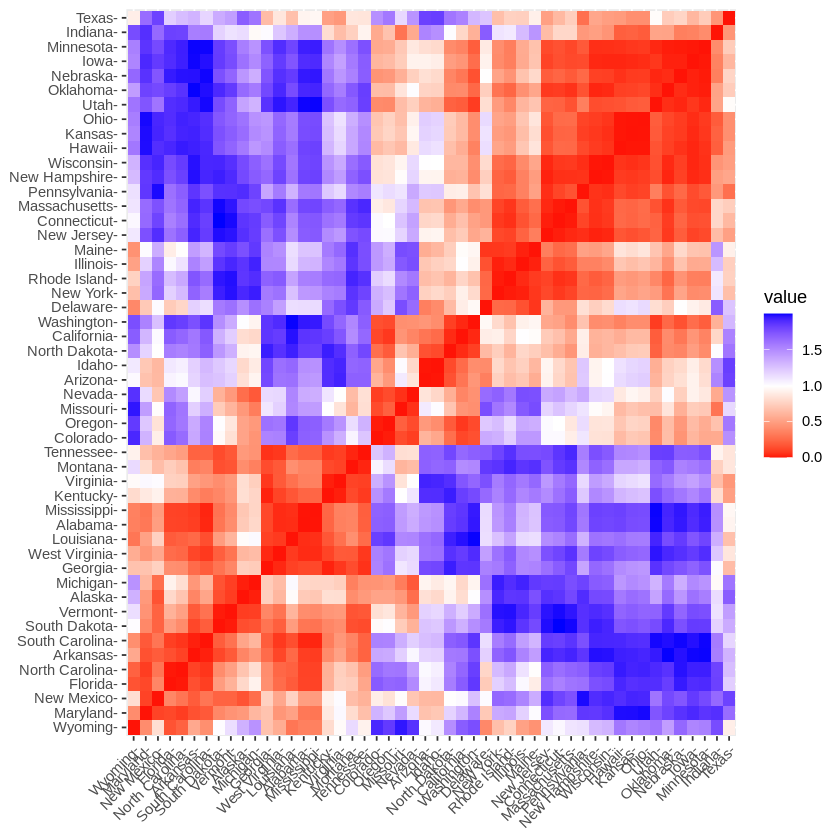

In [44]:
fviz_dist(dist.eucl)

fviz_dist(dist.cor)

Clustering Gap statistic ["clusGap"] from call:
clusGap(x = df, FUNcluster = kmeans, K.max = kmax, B = 50, nstart = 25)
B=50 simulated reference sets, k = 1..10; spaceH0="scaledPCA"
 --> Number of clusters (method 'firstmax'): 4
          logW   E.logW       gap     SE.sim
 [1,] 3.458369 3.640154 0.1817845 0.04422857
 [2,] 3.135112 3.372283 0.2371717 0.03559601
 [3,] 2.977727 3.233771 0.2560446 0.03749193
 [4,] 2.826221 3.119172 0.2929511 0.04067348
 [5,] 2.738868 3.019965 0.2810969 0.04185469
 [6,] 2.666967 2.930002 0.2630347 0.04105040
 [7,] 2.609895 2.852152 0.2422572 0.04184725
 [8,] 2.539156 2.778562 0.2394054 0.04292750
 [9,] 2.468162 2.711752 0.2435901 0.04344197
[10,] 2.407265 2.647595 0.2403307 0.04548446


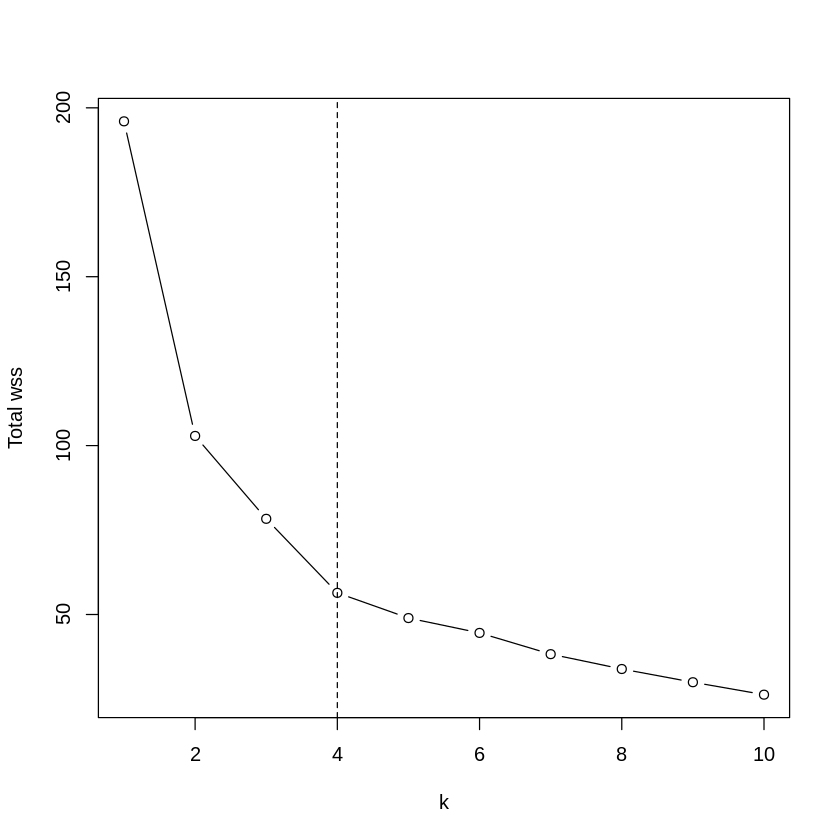

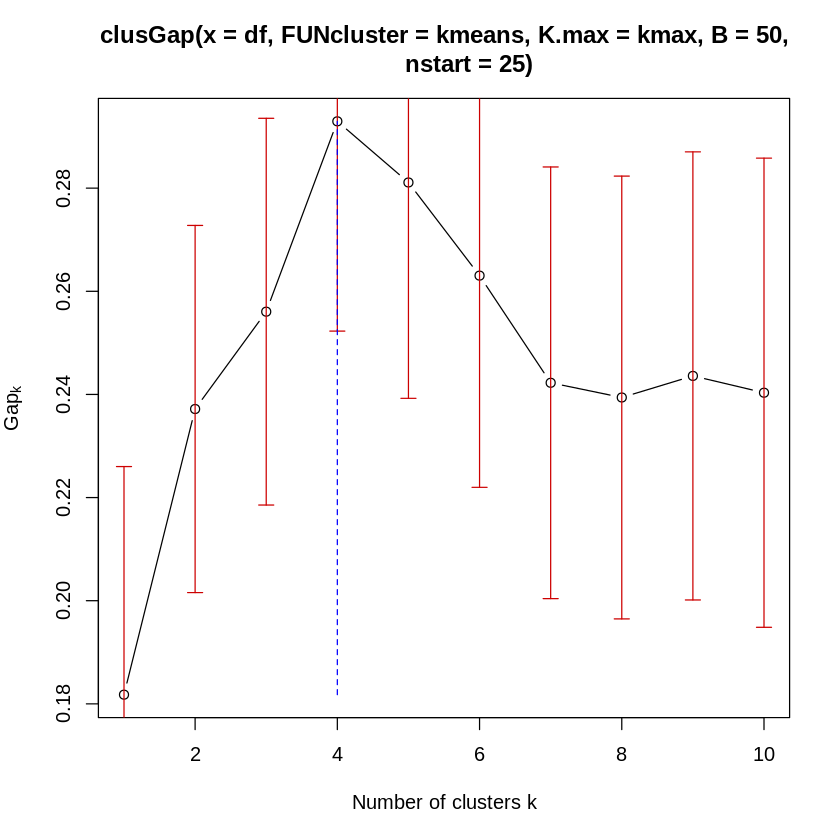

K-means clustering with 4 clusters of sizes 8, 13, 16, 13

Cluster means:
      Murder    Assault   UrbanPop        Rape
1  1.4118898  0.8743346 -0.8145211  0.01927104
2 -0.9615407 -1.1066010 -0.9301069 -0.96676331
3 -0.4894375 -0.3826001  0.5758298 -0.26165379
4  0.6950701  1.0394414  0.7226370  1.27693964

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             1              4              4              1              4 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             4              3              3              4              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              2              4              3              2 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              2              1              2              4 
 Massachusetts       Michigan      Minnesota    Mississippi    

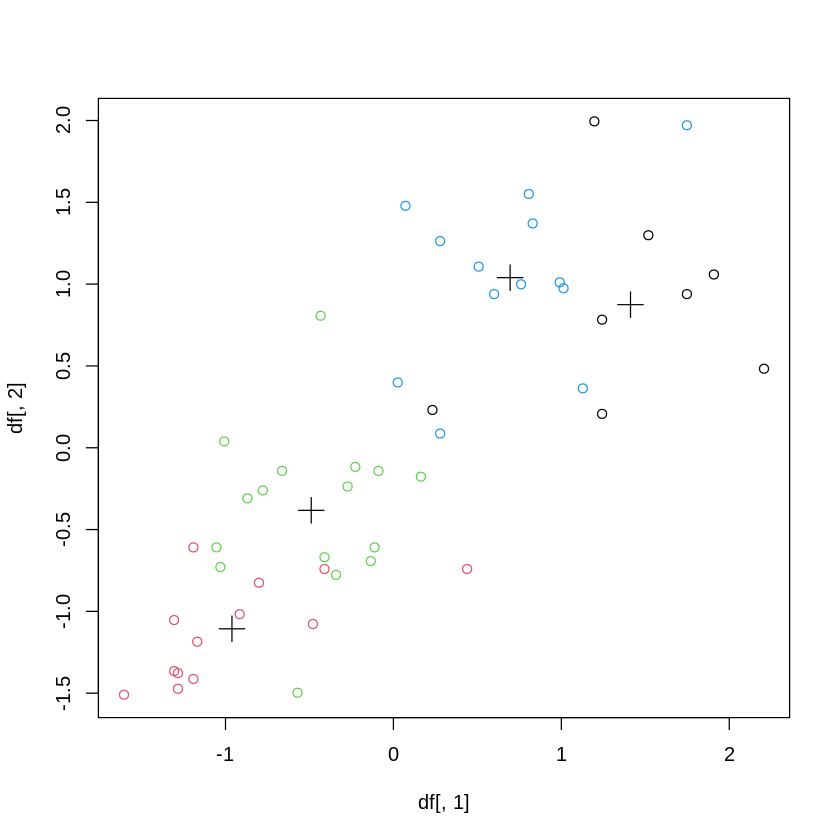

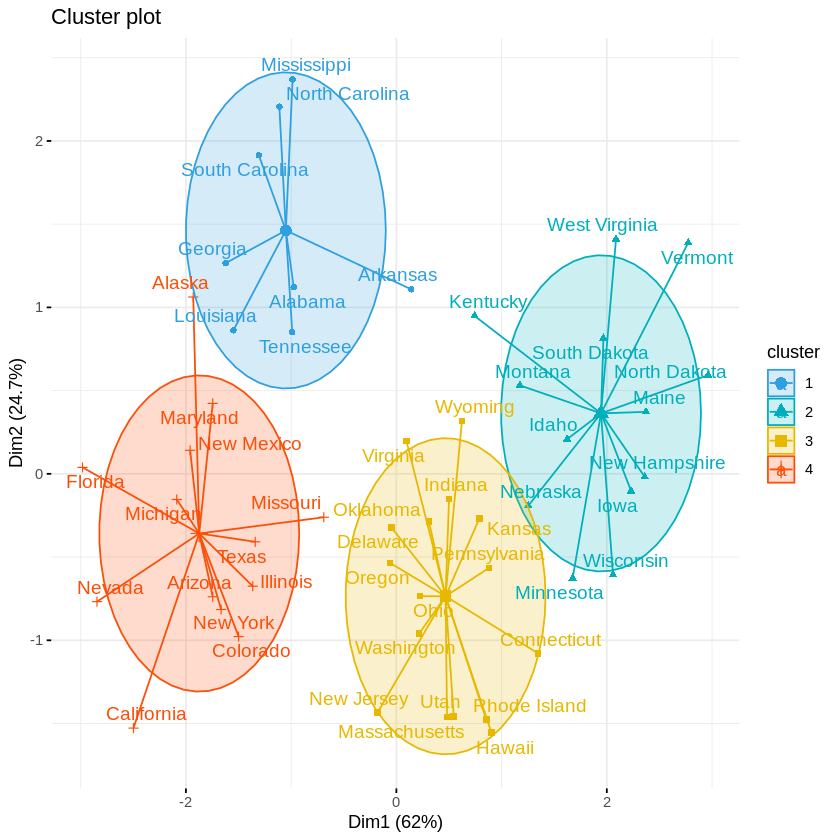

In [45]:
# K-means
kmax<-10
wss<-sapply(1:kmax, function(k) kmeans(df, centers = k, nstart = 10)$tot.withinss)

# Method 1: Ellbow criterion
plot(1:kmax, wss, type = 'b', xlab = 'k', ylab = 'Total wss')
abline(v=4, lty=2)

# Method 2: Gap statistic
set.seed(123)
gap_stat <- clusGap(df, FUN = kmeans, nstart = 25, K.max = kmax, B = 50)
print(gap_stat, method = "firstmax")
plot(gap_stat, xlab = "Number of clusters k")
gap.range <- range(gap_stat$Tab[,"gap"])
lines(rep(which.max(gap_stat$Tab[,"gap"]),2),gap.range, col="blue", lty=2)

# Do kmeans with K determined by Method 2
set.seed(123)
km.res <- kmeans(df, which.max(gap_stat$Tab[,"gap"]), nstart = 25)

# Simple visualization of Clusters 
plot(x=df[,1], y=df[,2], col=km.res$cluster)
points(km.res$centers, pch=3, cex=2)

# Print clusters
print(km.res)

fviz_cluster(km.res, data = df,
             palette = c("#2E9FDF", "#00AFBB", "#E7B800", "#FC4E07"), 
             ellipse.type = "euclid", 
             star.plot = TRUE, 
             repel = TRUE, 
             ggtheme = theme_minimal()
)

In [46]:
# Example 2: Boston Housing dataset
df <- Boston
df$chas <- NULL
df$rad <- NULL
head(df, n = 3)

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7


The BostonHousing dataset from the MASS package contains information collected by the U.S. Census Service concerning housing in the area of Boston, Massachusetts. There are 14 attributes in each case of the dataset:

• crim - per capita crime rate by town

• zn - proportion of residential land zoned for lots over 25,000 sq.ft.

• indus - proportion of non-retail business acres per town.

• chas - Charles River dummy variable (1 if tract bounds river; 0 otherwise) 

• nox - nitric oxides concentration (parts per 10 million)

• rm - average number of rooms per dwelling

• age - proportion of owner-occupied units built prior to 1940

• dis - weighted distances to five Boston employment centers

• rad - index of accessibility to radial highways

• tax - full-value property-tax rate per 10,000

• ptratio - pupil-teacher ratio by town

• black - 1000(B − 0.63)2 where B is the proportion of black people by town 

• lstat - lower status of the population (percent)

• medv - Median value of owner-occupied homes in US$ 1000’s

Warning message:
“did not converge in 10 iterations”


Clustering Gap statistic ["clusGap"] from call:
clusGap(x = df, FUNcluster = kmeans, K.max = 30, B = 50, nstart = 25)
B=50 simulated reference sets, k = 1..30; spaceH0="scaledPCA"
 --> Number of clusters (method 'firstmax'): 4
           logW    E.logW       gap      SE.sim
 [1,] 10.259193 10.464479 0.2052860 0.012909595
 [2,]  9.631639 10.168084 0.5364454 0.010685266
 [3,]  9.374306 10.026379 0.6520727 0.009976171
 [4,]  9.114895  9.901893 0.7869977 0.010492519
 [5,]  9.048930  9.817455 0.7685247 0.008795449
 [6,]  8.955384  9.749646 0.7942620 0.008713198
 [7,]  8.834728  9.705143 0.8704150 0.008050166
 [8,]  8.777102  9.665501 0.8883984 0.007470069
 [9,]  8.720842  9.630416 0.9095748 0.007632618
[10,]  8.663402  9.598543 0.9351415 0.008110487
[11,]  8.629723  9.571030 0.9413069 0.007859183
[12,]  8.594267  9.547545 0.9532778 0.007689492
[13,]  8.560834  9.527380 0.9665457 0.007932988
[14,]  8.536407  9.508730 0.9723228 0.007882288
[15,]  8.494689  9.491360 0.9966709 0.008216322
[16,]

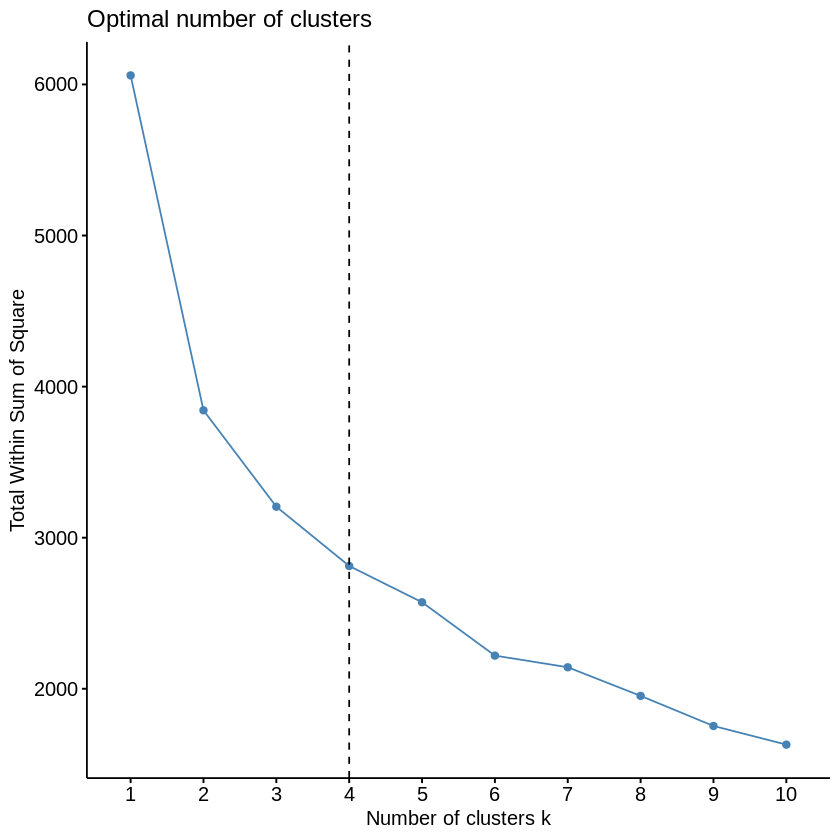

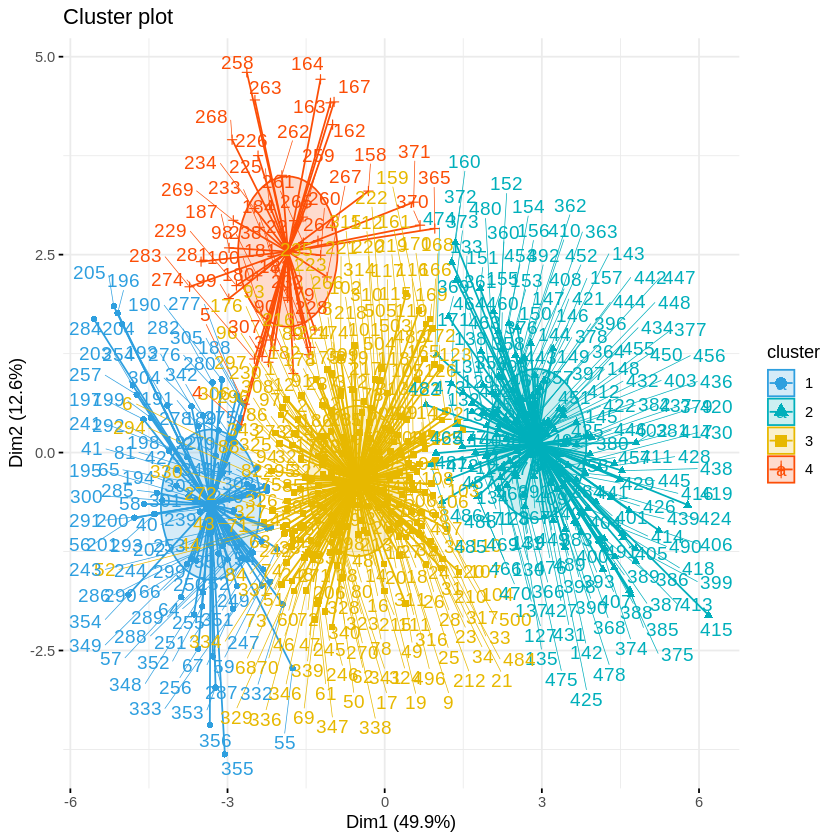

In [47]:
# K-means
df <- na.omit(df)
df.scaled <- scale(df)

fviz_nbclust(df.scaled, kmeans, method = "wss") +
  geom_vline(xintercept = 4, linetype = 2)

set.seed(123)
gap_stat <- clusGap(df, FUN = kmeans, nstart = 25, K.max = 30, B = 50)
print(gap_stat, method = "firstmax")

set.seed(123)
km.res <- kmeans(df.scaled, 4, nstart = 25)

print(km.res)

fviz_cluster(km.res, data = df.scaled,
             palette = c("#2E9FDF", "#00AFBB", "#E7B800", "#FC4E07"), 
             ellipse.type = "euclid", 
             star.plot = TRUE, 
             repel = TRUE, 
             ggtheme = theme_minimal()
)

Imagine you are supposed to provide data analysis for a real estate company based on the BostonHousing dataset. More precisely, you are asked to inform the company about the “natural” types of housing available in the Boston area.

a) Perform an appropriate analysis. How many housing groups do you find? What defines these housing groups? How are the groups different?

b) What housing group best fits a couple with two young children who want a large home?

c) What housing group best fits an elderly couple with modest income but who do not want to live in an industrial area?

d) What housing group best fits a single adult whose job requires lots of local travel and who likes being near rivers?
